In [1]:
import numpy as np
import pandas as pd
from rdflib import Graph

In [277]:
#input_path = 'result/TransD/metis/th_85/'
#input_path = 'result/TransD/metis/th_90/'

#input_path = 'result/TransD/semep/th_85/'
#input_path = 'result/TransD/semep/th_90/'

#input_path = 'result/TransD/Kmeans/th_85/'
input_path = 'result/TransD/Kmeans/th_90/'
"""
cls_0 = input_path + "standards-part0.txt"
cls_1 = input_path + "standards-part1.txt"

cls_2 = input_path + "standards-part2.txt"
cls_3 = input_path + "standards-part3.txt"
cls_4 = input_path + "standards-part4.txt"
cls_5 = input_path + "standards-part5.txt"
cls_6 = input_path + "standards-part6.txt"
"""
cls_0 = input_path + "cluster-0.txt"
cls_1 = input_path + "cluster-1.txt"

cls_2 = input_path + "cluster-2.txt"
cls_3 = input_path + "cluster-3.txt"
cls_4 = input_path + "cluster-4.txt"
cls_5 = input_path + "cluster-5.txt"
cls_6 = input_path + "cluster-6.txt"

cluster_0 = pd.read_csv(cls_0, delimiter=",", header=None)
cluster_1 =pd.read_csv(cls_1, delimiter=",", header=None)

cluster_2 =pd.read_csv(cls_2, delimiter=",", header=None)
cluster_3 =pd.read_csv(cls_3, delimiter=",", header=None)
cluster_4 =pd.read_csv(cls_4, delimiter=",", header=None)
cluster_5 =pd.read_csv(cls_5, delimiter=",", header=None)
cluster_6 =pd.read_csv(cls_6, delimiter=",", header=None)

cluster_0.columns = ['o']
cluster_1.columns = ['o']

cluster_2.columns = ['o']
cluster_3.columns = ['o']
cluster_4.columns = ['o']
cluster_5.columns = ['o']
cluster_6.columns = ['o']

cluster_0.shape[0]

24

In [278]:
cluster_0.head()

,o
0,https://w3id.org/i40/sto#IEC_61970_P1_E1
1,https://w3id.org/i40/sto#IEC_60864_P2_E1
2,https://w3id.org/i40/sto#IEC_61334_P4_S61_E1
3,https://w3id.org/i40/sto#ISO_24760
4,https://w3id.org/i40/sto#RFC_768


In [279]:
#hasClassification
input_ = 'sto/relatedTo/'
g = Graph()
g.parse(input_+'test_set_relatedTo.nt', format="nt")

test_set = pd.DataFrame(columns=['s', 'p', 'o'])
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        PREFIX sto: <https://w3id.org/i40/sto#>
        select distinct ?s ?p ?o where {
            ?s ?p ?o .
        }""")
sub = []
pre = []
obj = []
for row in qres:
    sub.append(str("%s" %row['s']))
    pre.append(str("%s" %row['p']))
    obj.append(str("%s" %row['o']))
test_set.s=sub
test_set.p=pre
test_set.o=obj
test_set.head()

,s,p,o
0,https://w3id.org/i40/sto#ISO_20922,https://w3id.org/i40/sto#relatedTo,https://w3id.org/i40/sto#ISO_PAS_17506
1,https://w3id.org/i40/sto#IEC_61804,https://w3id.org/i40/sto#relatedTo,https://w3id.org/i40/sto#ISO_18629
2,https://w3id.org/i40/sto#ISO_15531,https://w3id.org/i40/sto#relatedTo,https://w3id.org/i40/sto#ISO_15531-2x
3,https://w3id.org/i40/sto#IEC_61508,https://w3id.org/i40/sto#relatedTo,https://w3id.org/i40/sto#IEC_61508
4,https://w3id.org/i40/sto#IEC_61511,https://w3id.org/i40/sto#relatedTo,https://w3id.org/i40/sto#IEC_62061


In [280]:
sub=pd.DataFrame(test_set['s'])
sub.columns = ['o']
sub.head()

,o
0,https://w3id.org/i40/sto#ISO_20922
1,https://w3id.org/i40/sto#IEC_61804
2,https://w3id.org/i40/sto#ISO_15531
3,https://w3id.org/i40/sto#IEC_61508
4,https://w3id.org/i40/sto#IEC_61511


In [323]:
cls = cluster_6

In [324]:
intersected_df = pd.merge(cls, sub, how='inner', on='o')
intersected_df = intersected_df.drop_duplicates().reset_index(drop=True)
intersected_df.shape[0]

2

In [325]:
intersected_df.head()

,o
0,https://w3id.org/i40/sto#ISO_15531-2x
1,https://w3id.org/i40/sto#ISO_ASTM_52915


In [326]:
relation = pd.DataFrame(columns=['s', 'p', 'o'])
for i in range(intersected_df.shape[0]):
    if intersected_df.o.iloc[i] in list(test_set.s):
        index_0 = test_set[test_set.s == intersected_df.o.iloc[i]].index
        lst = test_set.loc[index_0]
        relation = pd.concat([relation, lst], ignore_index=True)
relation = pd.DataFrame(relation['o'])
relation.head()

,o
0,https://w3id.org/i40/sto#ISO_15531-3x
1,https://w3id.org/i40/sto#ISO_29002
2,https://w3id.org/i40/sto#DIN_SPEC_16592
3,https://w3id.org/i40/sto#IEC_62541
4,https://w3id.org/i40/sto#IEC_61804


In [327]:
relation = relation.drop_duplicates().reset_index(drop=True)
relation.shape[0]

9

In [328]:
intersected_relatedTo = pd.merge(cls, relation, how='inner', on='o')
intersected_relatedTo = intersected_relatedTo.drop_duplicates().reset_index(drop=True)
intersected_relatedTo.shape[0]

0

In [329]:
intersected_relatedTo.shape[0]/relation.shape[0]

0.0

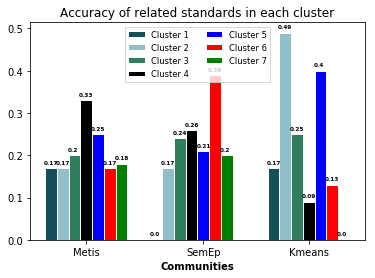

In [367]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
 
# set height of bar (TransD_th85)
#bars1 = [0.43, 0.42, 0.39]
#bars2 = [0.72, 0.67, 0.65]

# set height of bar (TransD_th85)
bars1 = [0.17, 0.00, 0.17]
bars2 = [0.17, 0.17, 0.49]
bars3 = [0.20, 0.24, 0.25]
bars4 = [0.33, 0.26, 0.09]
bars5 = [0.25, 0.21, 0.40]
bars6 = [0.17, 0.39, 0.13]
bars7 = [0.18, 0.20, 0.00]

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
#r1 = [0,0.4,0.8]
r1 = [0,0.9,1.9]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

# Make the plot
plt.bar(r1, bars1, color='#13505b', width=barWidth, edgecolor='white', label='Cluster 1')
plt.bar(r2, bars2, color='#90bfc9', width=barWidth, edgecolor='white', label='Cluster 2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Cluster 3')
plt.bar(r4, bars4, color='black', width=barWidth, edgecolor='white', label='Cluster 4')
plt.bar(r5, bars5, color='blue', width=barWidth, edgecolor='white', label='Cluster 5')
plt.bar(r6, bars6, color='red', width=barWidth, edgecolor='white', label='Cluster 6')
plt.bar(r7, bars7, color='green', width=barWidth, edgecolor='white', label='Cluster 7')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='N_relatedTo')

# Add xticks on the middle of the group bars
plt.xlabel('Communities', fontweight='bold')
#plt.xticks([0,0.4,0.8], ['Metis', 'SemEp', 'Kmeans'])
plt.xticks([0.3,1.3,2.2], ['Metis', 'SemEp', 'Kmeans'])
plt.title('Accuracy of related standards in each cluster')

for i, v in enumerate(bars1):
    plt.text(r1[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars2):
    plt.text(r2[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars3):
    plt.text(r3[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars4):
    plt.text(r4[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars5):
    plt.text(r5[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars6):
    plt.text(r6[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars7):
    plt.text(r7[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')

#plt.ylabel('Number of link prediction')
# Create legend & Show graphic
legend = plt.legend(loc='upper center', shadow=False, fontsize='small', ncol=2)

#plt.legend(loc='upper left')
plt.savefig("Accuracy of related standards(TransD_th90).pdf", format='pdf', bbox_inches = 'tight')
plt.show()

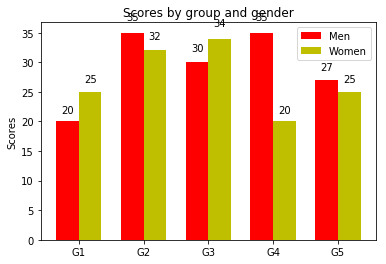

In [129]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r')

women_means = (25, 32, 34, 20, 25)
rects2 = ax.bar(ind + width, women_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [183]:
from rdflib import Graph,URIRef, tools
from gastrodon import LocalEndpoint,one,QName
g = Graph()
g.parse("sto/sto-enriched.nt", format="nt")
sto_endpoint=LocalEndpoint(g)

#data = [cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6]
data = [cluster_0,cluster_1]
list_pd = {}

for i in range(len(data)):
    list_pd[i] = pd.DataFrame(columns=['o'])
i=0
count = 0
for cls in data:
    for standard in cls['o']:
        qres_tc = sto_endpoint.select(
            """PREFIX owl: <http://www.w3.org/2002/07/owl#>
                   PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
                   PREFIX tc: <https://w3id.org/i40/sto/iot#>

                select distinct ?o where {
                        <""" +standard+ """> tc:hasTargetConcern ?o .
                }""")
        qres = sto_endpoint.select(
            """PREFIX owl: <http://www.w3.org/2002/07/owl#>
                   PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
                   PREFIX dom: <https://w3id.org/i40/sto#>

                select distinct ?o where {
                        <""" +standard+ """> dom:hasDomain ?o .
                }""")
        if len(qres_tc)>0:
            list_pd[i] = pd.concat([list_pd[i], qres_tc], ignore_index=True)
        if len(qres)>0:
            list_pd[i] = pd.concat([list_pd[i], qres], ignore_index=True)
        count+=(len(qres_tc) + len(qres))
    i+=1
print(count)

61


In [150]:
#15+2+1+32+3+3+5
#sum(domain_sto.number_standard)

61

In [177]:
j=1
domain_sto = pd.DataFrame(columns=['domain',  'number_standard'])
domain_sto.domain=list(pd.value_counts(list_pd[j]['o'].values, 0).index)
domain_sto.number_standard = list(pd.value_counts(list_pd[j]['o'].values, 0))
domain_sto = domain_sto.sort_values(by='number_standard', ascending=False)

domain_sto

,domain,number_standard
7,https://w3id.org/i40/sto#IndustrialAutomation,5
8,https://w3id.org/i40/sto#ITSecurity,5
0,https://w3id.org/i40/sto#Safety,3
1,https://w3id.org/i40/sto#CloudComputing,2
2,https://w3id.org/i40/sto#IdentityManagement,2
4,https://w3id.org/i40/sto#QualityOfService,2
9,https://w3id.org/i40/sto#CAD,2
11,https://w3id.org/i40/sto#IndustrialProcessMeas...,2
3,https://w3id.org/i40/sto#Safety_Machinery,1
5,https://w3id.org/i40/sto#EnterpriseIntegration,1


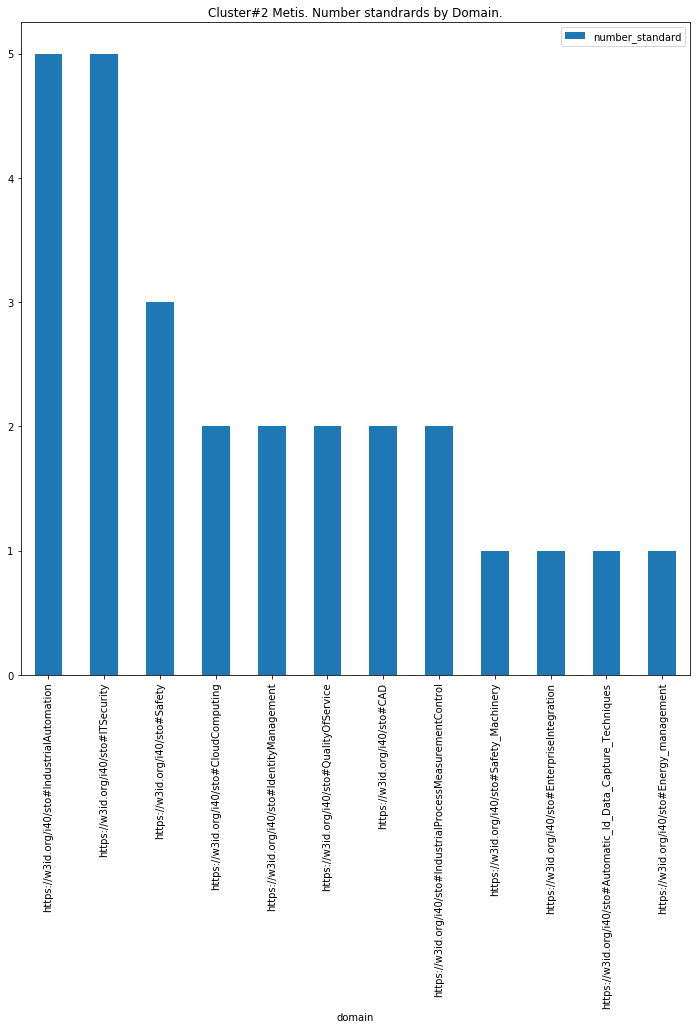

In [178]:
fig = domain_sto.plot.bar(x='domain', y='number_standard',figsize=(12, 12),title='Cluster#2 Metis. Number standrards by Domain.').get_figure()
fig.savefig('Th:0.85(Cls#2.Metis).pdf')

In [190]:
from rdflib import Graph,URIRef, tools
g = Graph()
g.parse("sto/sto-enriched.nt", format="nt")
#sto_endpoint=LocalEndpoint(g)

#data = [cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6]
data = [cluster_0,cluster_1]
list_pd = {}

for i in range(len(data)):
    list_pd[i] = pd.DataFrame(columns=['o'])
i=0
for cls in data:
    for standard in cls['o']:
        qres = g.query(
            """PREFIX owl: <http://www.w3.org/2002/07/owl#>
                   PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
                   PREFIX sto: <https://w3id.org/i40/sto#>

                select distinct ?o where {
                        <""" +standard+ """> sto:relatedTo ?o .
                }""")
        lst = pd.DataFrame(columns=['o'])
        obj = []
        for row in qres:
            obj.append(str("%s" %row))
        lst.o=obj
        if len(lst)>0:
            list_pd[i] = pd.concat([list_pd[i], lst], ignore_index=True)
        else:
            count+=1
    list_pd[i] = list_pd[i].drop_duplicates().reset_index(drop=True)
    
    intersected_df = pd.merge(list_pd[i], cls, how='inner', on='o')
    difference = list_pd[i][~list_pd[i].apply(tuple,1).isin(intersected_df.apply(tuple,1))]
    print(len(cls))
    print('number standards without relatedTo: ',count)
    #print(len(intersected_df))
    #print(len(difference))
    print(len(intersected_df)/len(list_pd[i]))
    print('number total relateTo: ',len(list_pd[i]))
    print('------')
    count = 0
    i+=1

157
number standards without relatedTo:  128
0.6
number total relateTo:  55
------
165
number standards without relatedTo:  136
0.49206349206349204
number total relateTo:  63
------


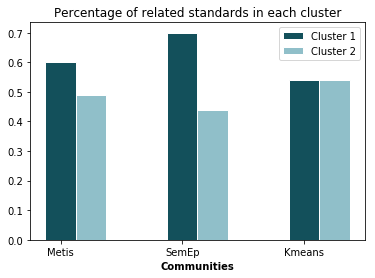

In [188]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [0.6, 0.7, 0.54]
bars2 = [0.49, 0.44, 0.54]



# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [0,0.4,0.8]
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#13505b', width=barWidth, edgecolor='white', label='Cluster 1')
plt.bar(r2, bars2, color='#90bfc9', width=barWidth, edgecolor='white', label='Cluster 2')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='N_relatedTo')

 
# Add xticks on the middle of the group bars
plt.xlabel('Communities', fontweight='bold')
plt.xticks([0,0.4,0.8], ['Metis', 'SemEp', 'Kmeans'])
plt.title('Percentage of related standards in each cluster')
#plt.ylabel('Number of link prediction')
# Create legend & Show graphic
plt.legend()
plt.savefig("Percent of related standards.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()

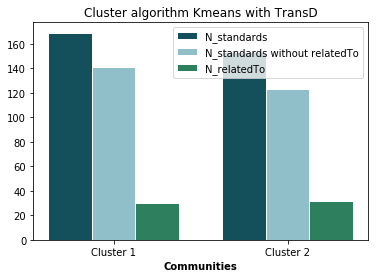

In [189]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [169, 153]
bars2 = [141, 123]
bars3 = [30, 32]


# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [0,0.4]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#13505b', width=barWidth, edgecolor='white', label='N_standards')
plt.bar(r2, bars2, color='#90bfc9', width=barWidth, edgecolor='white', label='N_standards without relatedTo')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='N_relatedTo')

 
# Add xticks on the middle of the group bars
plt.xlabel('Communities', fontweight='bold')
plt.xticks([0.1,0.5], ['Cluster 1', 'Cluster 2'])
plt.title('Cluster algorithm Kmeans with TransD')
#plt.ylabel('Number of link prediction')
# Create legend & Show graphic
plt.legend()
plt.savefig("Cluster algorithm Kmeans with TransD.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()

In [6]:
from rdflib import Graph,URIRef, tools
from gastrodon import LocalEndpoint,one,QName
g = Graph()
g.parse("sto/sto-enriched.nt", format="nt")
sto_endpoint=LocalEndpoint(g)
i=0
link_analysis = pd.DataFrame(columns=['link_prediction', 'link_found'])
data = [cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6]
#relation = pd.DataFrame(columns=['o'])
for cls in data:
    relation = pd.DataFrame(columns=['o'])
    for standard in cls['o']:
        qres = sto_endpoint.select(
            """PREFIX owl: <http://www.w3.org/2002/07/owl#>
                   PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
                   PREFIX sto: <https://w3id.org/i40/sto#>

                select distinct ?o where {
                        <""" +standard+ """> sto:relatedTo ?o .
                }""")
        if len(qres)>0:
            relation = pd.concat([relation, qres], ignore_index=True)
            #print(standard)
            i+=1
    relation = relation.drop_duplicates()
    intersected_df = pd.merge(cls, relation, how='inner')
    print(cls.shape[0])
    if intersected_df.shape[0]>0:
        print('standard:', standard)
        #print('link_found', intersected_df)
    n_link_pred = ((cls.shape[0]*cls.shape[0])-cls.shape[0])-intersected_df.shape[0]
    n_link_found = intersected_df.shape[0]
    print('n_link_pred', n_link_pred)
    new_row = {'link_prediction':n_link_pred, 'link_found':n_link_found}
    link_analysis = link_analysis.append(new_row, ignore_index=True)
    print('-------------------------------------------------')

44
n_link_pred 1892
-------------------------------------------------
46
n_link_pred 2070
-------------------------------------------------
47
n_link_pred 2162
-------------------------------------------------
47
n_link_pred 2162
-------------------------------------------------
44
n_link_pred 1892
-------------------------------------------------
47
n_link_pred 2162
-------------------------------------------------
47
n_link_pred 2162
-------------------------------------------------


In [7]:
link_analysis

,link_prediction,link_found
0,1892,0
1,2070,0
2,2162,0
3,2162,0
4,1892,0
5,2162,0
6,2162,0


In [8]:
link_analysis = pd.DataFrame(columns=['link_prediction', 'link_found'])
new_row = {'link_prediction':12, 'link_found':23}
link_analysis = link_analysis.append(new_row, ignore_index=True)
new_row = {'link_prediction':56, 'link_found':283}
link_analysis = link_analysis.append(new_row, ignore_index=True)
new_row = {'link_prediction':78, 'link_found':56785}
link_analysis = link_analysis.append(new_row, ignore_index=True)
link_analysis

,link_prediction,link_found
0,12,23
1,56,283
2,78,56785


In [9]:
link = pd.DataFrame(columns=['link_prediction', 'link_found'])
new_row = {'link_prediction':78, 'link_found':56785}
link = link.append(new_row, ignore_index=True)
new_row = {'link_prediction':56, 'link_found':283}
link = link.append(new_row, ignore_index=True)
new_row = {'link_prediction':9, 'link_found':13}
link = link.append(new_row, ignore_index=True)
new_row = {'link_prediction':56, 'link_found':283}
link = link.append(new_row, ignore_index=True)
new_row = {'link_prediction':9, 'link_found':13}
link = link.append(new_row, ignore_index=True)
link

,link_prediction,link_found
0,78,56785
1,56,283
2,9,13
3,56,283
4,9,13


In [10]:
link = link.drop_duplicates()
link

,link_prediction,link_found
0,78,56785
1,56,283
2,9,13


In [11]:
intersected = pd.merge(link_analysis, link, how='inner')
intersected

,link_prediction,link_found
0,56,283
1,78,56785


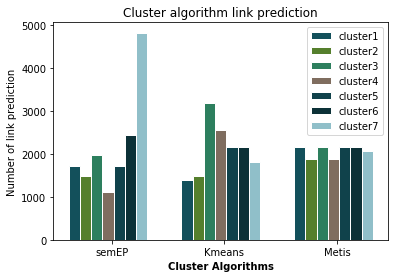

In [13]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = [1722, 1406, 2162]
bars2 = [1482, 1482, 1892]
bars3 = [1980, 3192, 2162]
bars4 = [1122, 2550, 1892]
bars5 = [1722, 2162, 2162]
bars6= [2450, 2162, 2162]
bars7 = [4830, 1806, 2070]

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [0,1.5,3]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 
# Make the plot
plt.bar(r1, bars1, color='#13505b', width=barWidth, edgecolor='white', label='cluster1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='cluster2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='cluster3')
plt.bar(r4, bars4, color='#7f6d5f', width=barWidth, edgecolor='white', label='cluster4')
plt.bar(r5, bars5, color='#10424b', width=barWidth, edgecolor='white', label='cluster5')
plt.bar(r6, bars6, color='#0c3137', width=barWidth, edgecolor='white', label='cluster6')
plt.bar(r7, bars7, color='#90bfc9', width=barWidth, edgecolor='white', label='cluster7')
 
# Add xticks on the middle of the group bars
plt.xlabel('Cluster Algorithms', fontweight='bold')
plt.xticks([0.5,2,3.5], ['semEP', 'Kmeans', 'Metis'])
plt.title('Cluster algorithm link prediction')
plt.ylabel('Number of link prediction')
# Create legend & Show graphic
plt.legend()
plt.savefig("Cluster_algorithm_link_prediction.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()

In [139]:
r1

array([0, 1, 2])

In [130]:
relation.shape

(67, 1)

In [131]:
i

58